## Vechicle Loan Default Prediction

# 1. Import Libraries

In [1]:
# importing Numpy for Advance Mathematical Calculations
import numpy as np

# importing pandas for manipulation of data
import pandas as pd

# importing matplotlib for visualizing data
import matplotlib.pyplot as plt
%matplotlib inline

# import seabonr
import seaborn as sns

#importing warnings to avoid displaying
import warnings
warnings.filterwarnings(action='ignore')


# display all columns of the dataframe
pd.options.display.max_columns=None

# display all rows of the dataframe
pd.options.display.max_rows = None

#displaying Standard Scaler for scaling data
from sklearn.preprocessing import StandardScaler

#importing train test split from scikit learn
from sklearn.model_selection import train_test_split

#importing statistics library from scipy library
import scipy.stats as st

# 2. Data Preparation

## 2.1 Understand the Data

In [89]:
# Reading the csv file and store in df 
df = pd.read_csv('D:/Hareesh_GreatLearning/train.csv')

#Fetching First 5 rows of the  Data set
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


**we will make a copy of this dataframe so that original dataframe will not be altered**

In [90]:
df_copy = df.copy()  # df_copy is the original dataset now

**Let us now see the number of variables and observations in the data.**

In [91]:
# Use shape tuple to check the dimensions of the data
df.shape

(233154, 41)

**Interpretation:** The data has 2,33,154 observations and 41 variables.

**Get a concise summary of the DataFrame.**

In [92]:
# use 'info()' to understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [6]:
# Checking five point summary of the numerical features
df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [7]:
# Checking the five point summary of the categorical features
df.describe(include='object')

,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,PERFORM_CNS_SCORE_DESCRIPTION,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
count,233154,225493,233154,233154,233154,233154
unique,15433,2,84,20,192,294
top,01-01-1988,Self employed,31-10-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,2173,127635,8826,116950,119373,119127


In [93]:
# Date of Birth and Disbursal date needs to  be converted to datetime

# Age column can be created using (DOB - Disbursal Date)

#importing datetime library
import datetime

#converting to date time
df['DISBURSAL_DATE']  = pd.to_datetime(df['DISBURSAL_DATE'])
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])

# retriving only the year to calculate Age
df['DISBURSAL_DATE'] = df['DISBURSAL_DATE'].apply(lambda x : datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").year)
df['DATE_OF_BIRTH'] = df['DATE_OF_BIRTH'].apply(lambda x : datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").year)


#  Age = Year of Disturbal  - Year of DOB
df['Age'] = df['DISBURSAL_DATE'] - df['DATE_OF_BIRTH']

In [94]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'Age'],
      dtype='object')

**Age feature has been created** : This features shows the age of the person when the loan got disbursed

In [10]:
# converting  AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH to float variables

In [95]:
# Adding some logic to convert (1yr 8 months) to integer (i.e) 1.8
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].str.replace('yrs ','.',regex=False)
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].str.replace('mon','',regex=False).astype(float)
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].str.replace('yrs ','.',regex=False)
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].str.replace('mon','',regex=False).astype(float)

In [96]:
# Displaying first five rows to check the data
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,Age
0,420825,50578,58400,89.55,67,22807,45,1441,1984,Salaried,2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,34
1,537409,47145,65550,73.23,67,22807,45,1502,1985,Self employed,2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.11,1.11,0,1,33
2,417566,53278,61360,89.63,67,22807,45,1497,1985,Self employed,2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,33
3,624493,57513,66113,88.48,67,22807,45,1501,1993,Self employed,2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.80,1.30,1,1,25
4,539055,52378,60300,88.39,67,22807,45,1495,1977,Self employed,2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1,1,41


In [12]:
# Checking five point summary after clean up - integers
df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,Age
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,1983.899054,2018.0,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.715615,1.327379,0.206615,0.217071,34.100946
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,9.805992,0.0,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,1.252152,2.367571,0.706498,0.412252,9.805992
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1949.000000,2018.0,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,1977.000000,2018.0,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,1986.000000,2018.0,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,1992.000000,2018.0,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,1.100000,2.000000,0.000000,0.000000,41.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,2000.000000,2018.0,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3

In [9]:
df.describe(include ='object')

,EMPLOYMENT_TYPE,PERFORM_CNS_SCORE_DESCRIPTION
count,225493,233154
unique,2,20
top,Self employed,No Bureau History Available
freq,127635,116950


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  int64  
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  int64  
 11  STATE_ID     

**Interpretation:** by looking at the datatypes of columns, we can say that all the variables have correct data type.

## 2.2 Remove Insignificant Variables

In [16]:
# columns such as UNIQUEID,BRANCH_ID,SUPPLIER_ID, MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID
# we have retrieved age column from disbursal date and DOB , so DOB and disbursal date can be droppped as well

In [97]:
df = df.drop(['UNIQUEID','BRANCH_ID','SUPPLIER_ID','CURRENT_PINCODE_ID',
              'STATE_ID','EMPLOYEE_CODE_ID','DATE_OF_BIRTH','DISBURSAL_DATE'],axis=1)

In [126]:
# Checking the dimension of the data after dropping unnecessary columns

In [12]:
df.shape

(233154, 34)

**There are 34 columns after clean up**

**checking unique values present in the columns of the dataset**

In [98]:
u=[]

for i in df.columns:
    u.append((df[i].nunique(dropna=True)))

# dataframe for storing unique values against each variable  
d=pd.DataFrame(u,index=df.columns,columns=['Unique values'])

d

,Unique values
DISBURSED_AMOUNT,24565
ASSET_COST,46252
LTV,6579
MANUFACTURER_ID,11
EMPLOYMENT_TYPE,2
MOBILENO_AVL_FLAG,1
AADHAR_FLAG,2
PAN_FLAG,2
VOTERID_FLAG,2
DRIVING_FLAG,2


In [99]:
# As we can see there is only one value in MOBILENO_AVL_FLAG. So we can drop it.
df=df.drop(['MOBILENO_AVL_FLAG'],axis=1)

In [100]:
# Both PERFORM_CNS_SCORE & PERFORM_CNS_SCORE_DESCRIPTION gives the same data, hence we are dropping CNS score description
df = df.drop(['PERFORM_CNS_SCORE_DESCRIPTION'], axis = 1)

In [18]:
# Converting flag features to objects to check the frequency of data

In [101]:
df[['AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG','DRIVING_FLAG', 'PASSPORT_FLAG','LOAN_DEFAULT']]=df[['AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG','LOAN_DEFAULT']].astype('object')

In [102]:
df.describe(include ='object')

,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,LOAN_DEFAULT
count,225493,233154,233154,233154,233154,233154,233154
unique,2,2,2,2,2,2,2
top,Self employed,1,0,0,0,0,0
freq,127635,195924,215533,199360,227735,232658,182543


In [103]:
# As we can see that in Passsport_flag as there are max of 0 only and only a few has 1 as it's value

# Hence droppping passport flag
df=df.drop(['PASSPORT_FLAG'],axis=1)

In [104]:
# extracting numerical features from 'df' dataframe
n=df.select_dtypes(include=[np.number])


n.apply(lambda x : np.format_float_positional(x.var()))

DISBURSED_AMOUNT                         168254991.31262335
ASSET_COST                                 358904738.075358
LTV                                      131.25450245137307
MANUFACTURER_ID                           490.2373355531252
PERFORM_CNS_SCORE                        114497.49106871875
PRI_NO_OF_ACCTS                          27.219520401432387
PRI_ACTIVE_ACCTS                           3.76940843092456
PRI_OVERDUE_ACCTS                        0.3011668968421977
PRI_CURRENT_BALANCE                       887879504003.5107
PRI_SANCTIONED_AMOUNT                     5639647139776.582
PRI_DISBURSED_AMOUNT                      5653665797902.566
SEC_NO_OF_ACCTS                          0.3928714515355524
SEC_ACTIVE_ACCTS                         0.0998917797790493
SEC_OVERDUE_ACCTS                      0.012338527272331904
SEC_CURRENT_BALANCE                       28980634342.89091
SEC_SANCTIONED_AMOUNT                    33546117797.121155
SEC_DISBURSED_AMOUNT                    

**Interpretation:** As we can see from above, all the columns have considerable amount of variance so we are not dropping any of the numerical columns based on the variance.

**Now let us remove numerical columns based on high coorelation.**

Display correlated values only which are greater than 0.8 or less than -0.8

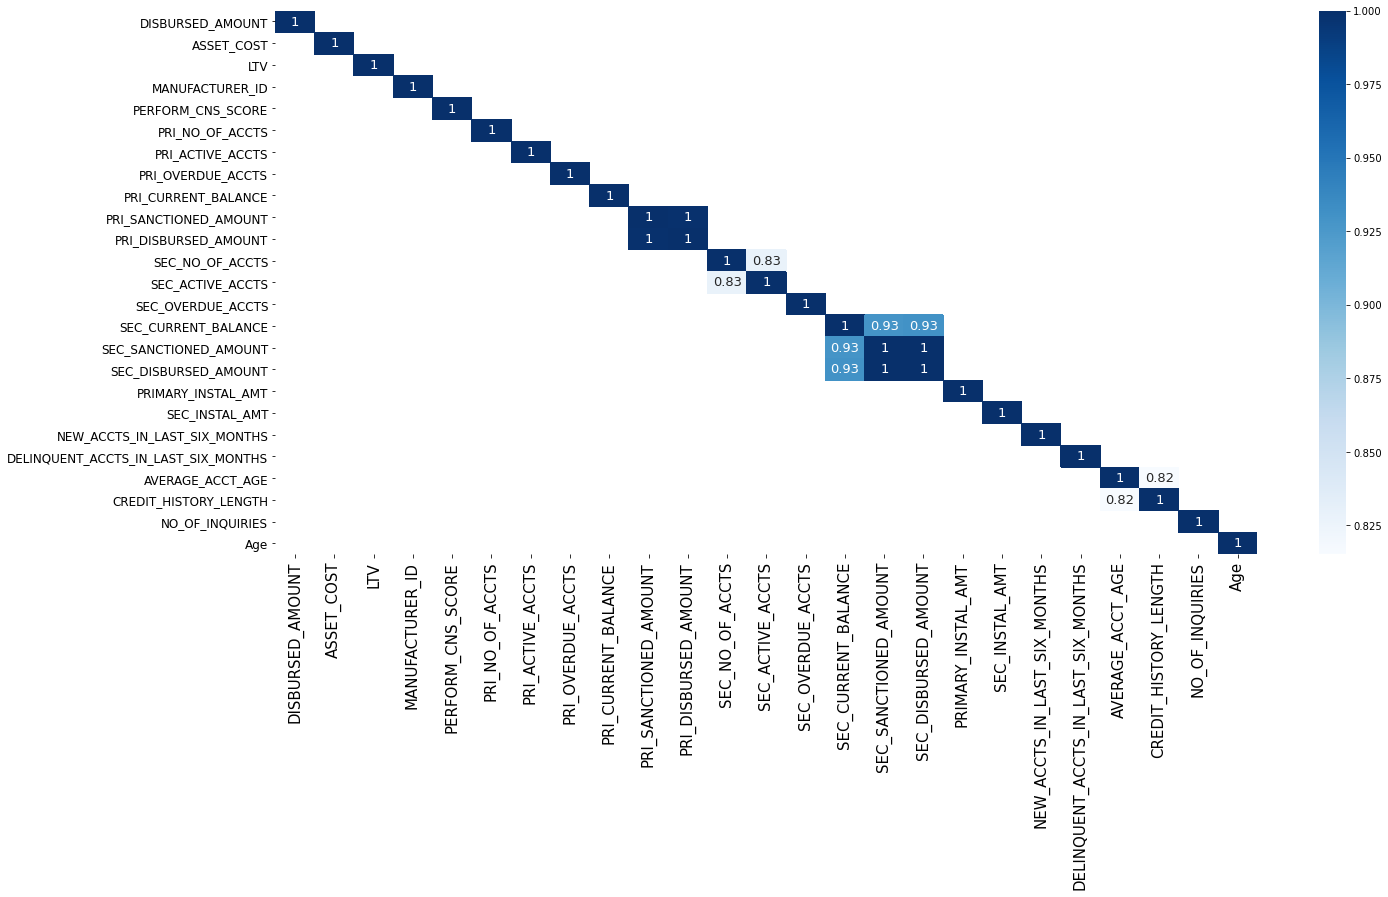

In [28]:
plt.figure(figsize = (22,10))


sns.heatmap(df.corr()[np.abs(df.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

From the above heat map we can see that the columns PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT have a very high co relations and so do SEC_SANCTIONED_AMOUNT, SEC_DISBURSED_AMOUNT

In [105]:
# Droppping Primary Sanctioned and Secondary Sanctioned Amount
df=df.drop(['PRI_SANCTIONED_AMOUNT'],axis=1)
df=df.drop(['SEC_SANCTIONED_AMOUNT'],axis=1)

In [106]:
print('Columns left after removing insignificant variables are :\n\n',list(df.columns),end='\n\n')
print('Number of columns left after removing insignificant variables are :',len(df.columns))

Columns left after removing insignificant variables are :

 ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'MANUFACTURER_ID', 'EMPLOYMENT_TYPE', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age']

Number of columns left after removing insignificant variables are : 29


In [107]:
df.shape

(233154, 29)

# 2.3 Checking For Duplicates

In [21]:
df.duplicated().sum()

254

**There are 254 duplicate rows present in the Data**

In [108]:
# Removing duplicate rows in the data set
df.drop_duplicates(inplace=True)

In [109]:
df.duplicated().sum()

0

**There are 0 duplicate rows present in the Data**

## 2.4 Missing Value Analysis and Treatment

In [110]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/len(df)).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
EMPLOYMENT_TYPE,7651,3.285101
Age,0,0.000000
PRI_CURRENT_BALANCE,0,0.000000
ASSET_COST,0,0.000000
LTV,0,0.000000
MANUFACTURER_ID,0,0.000000
AADHAR_FLAG,0,0.000000
PAN_FLAG,0,0.000000
VOTERID_FLAG,0,0.000000
DRIVING_FLAG,0,0.000000


 EMPLOYMENT_TYPE has 3.29% of Null Values .
 Except that , All other Features doesnt have Null Values

In [111]:
# Dropping the Rows That have Null Values
df.dropna(subset= ['EMPLOYMENT_TYPE'],axis=0,inplace=True)

In [112]:
# Checking the Shape of the Data After Null Values of Employee Type
df.shape

(225249, 29)

In [113]:
# Checking the Value Counts
df['EMPLOYMENT_TYPE'].value_counts()

Self employed    127514
Salaried          97735
Name: EMPLOYMENT_TYPE, dtype: int64

# 3. Exploratory Data Analysis

### Target Variable Balance Check

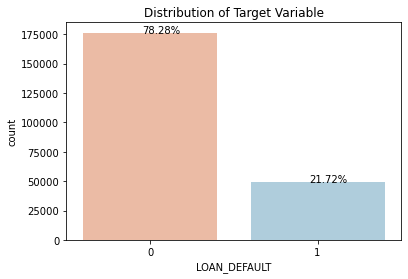

In [38]:
sns.countplot(df['LOAN_DEFAULT'],palette='RdBu')
plt.title('Distribution of Target Variable')
plt.text(x = -0.05, y = df['LOAN_DEFAULT'].value_counts()[0] + 1, 
         s = str(round((df['LOAN_DEFAULT'].value_counts()[0])*100/len(df),2)) + '%')
plt.text(x = 0.95, y = df['LOAN_DEFAULT'].value_counts()[1] +1, 
         s = str(round((df['LOAN_DEFAULT'].value_counts()[1])*100/len(df),2)) + '%')
plt.show()

### Data is Imbalanced . Need to take Bootstrap Sampling(Sampling with Replacement) After building base models to increase the accuracy

In [114]:
# Separating numerical and categorical features for EDA
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(exclude = np.number)

In [115]:
df_num.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age
0,50578,58400,89.55,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,34
1,47145,65550,73.23,45,598,1,1,1,27600,50200,0,0,0,0,0,1991,0,0,1,1.11,1.11,0,33
2,53278,61360,89.63,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,33
3,57513,66113,88.48,45,305,3,0,0,0,0,0,0,0,0,0,31,0,0,0,0.80,1.30,1,25
4,52378,60300,88.39,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1,41


In [120]:
df_cat.head()

,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,LOAN_DEFAULT
0,Salaried,1,0,0,0,No
1,Self employed,1,0,0,0,Yes
2,Self employed,1,0,0,0,No
3,Self employed,1,0,0,0,Yes
4,Self employed,1,0,0,0,Yes


## Hypothesis Testing

In [135]:
df['LOAN_DEFAULT'] = ['No' if i==0 else 'Yes' for i in df['LOAN_DEFAULT']]

In [123]:
df_cat.drop('LOAN_DEFAULT',axis=1,inplace=True)

In [124]:
import scipy.stats as st

In [138]:
# categorical vs target
# chi-square test for independence of attributes:
#   H0: variables are independent
#   H1: variables are dependent

c_pvals = []
for i in df_cat.columns:
    obs = pd.crosstab(df_cat[i],df['LOAN_DEFAULT'])
    stat,pval,dof,exp = st.chi2_contingency(obs)
    c_pvals.append(pval)
    
pd.DataFrame({'Features':df_cat.columns,'p_value':c_pvals})

,Features,p_value
0,EMPLOYMENT_TYPE,2.322232e-43
1,AADHAR_FLAG,5.411133e-94
2,PAN_FLAG,3.650144e-01
3,VOTERID_FLAG,4.060752e-104
4,DRIVING_FLAG,8.480237e-03


In [137]:

# numerical vs target
# Two tailed Two-Sample T-Test:
#   H0: mean1 = mean2
#   H1: mean1 !=mean2

n_pvals = []
for i in df_num.columns:
    a=df[df['LOAN_DEFAULT'] == 'Yes'][i]
    b=df[df['LOAN_DEFAULT'] == 'No'][i]
    tstat,pval = st.ttest_ind(a,b)
    n_pvals.append(pval)
    
pd.DataFrame({'Features':df_num.columns,'p_value':n_pvals})

,Features,p_value
0,DISBURSED_AMOUNT,0.000000e+00
1,ASSET_COST,9.491570e-14
2,LTV,0.000000e+00
3,MANUFACTURER_ID,5.237864e-34
4,PERFORM_CNS_SCORE,1.587953e-177
5,PRI_NO_OF_ACCTS,1.905804e-65
6,PRI_ACTIVE_ACCTS,6.133460e-90
7,PRI_OVERDUE_ACCTS,3.536665e-84
8,PRI_CURRENT_BALANCE,4.830819e-39
9,PRI_DISBURSED_AMOUNT,1.289301e-07


**Since all the p_vals < alpha(0.05), all the features have some relation with target variable**

      EMPLOYMENT_TYPE vs LOAN_DEFAULT


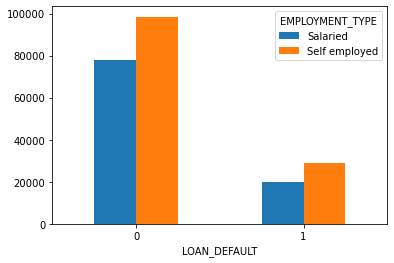

      AADHAR_FLAG vs LOAN_DEFAULT


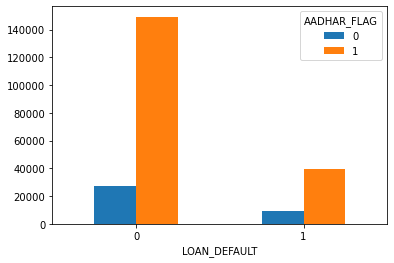

      PAN_FLAG vs LOAN_DEFAULT


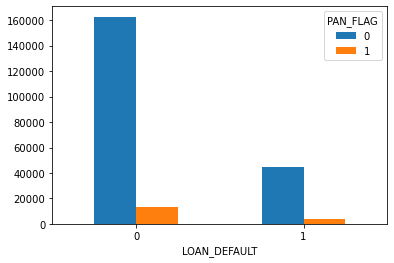

      VOTERID_FLAG vs LOAN_DEFAULT


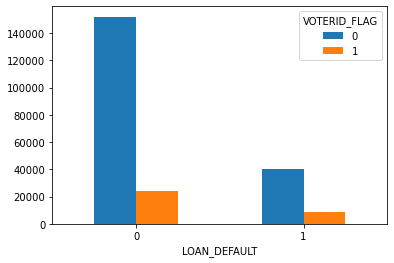

      DRIVING_FLAG vs LOAN_DEFAULT


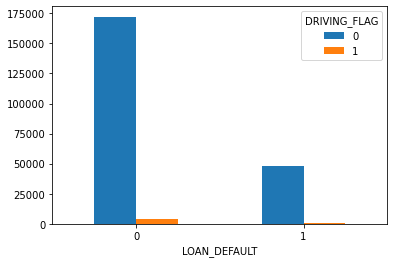

      LOAN_DEFAULT vs LOAN_DEFAULT


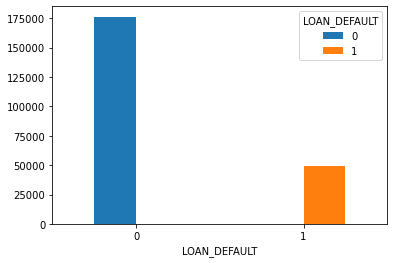

In [56]:
for i in df_cat.columns:
    pd.crosstab(df['LOAN_DEFAULT'],df[i]).plot(kind='bar')
    plt.xticks(rotation=0)
    plt.title(print('     ',i ,'vs LOAN_DEFAULT'))
    plt.show()

1. `EMPLOYMENT_TYPE` vs `LOAN_DEFAULT`
    The number of defaulters are comparatively high for the people who are self employed. 
2. `AADHAR_FLAG` vs `LOAN_DEFAULT`
    Most of the people having aadhar card seems to be defaulters.
3. `PAN_FLAG` vs `LOAN_DEFAULT`
    Most of the people who are not having pan card seems to be defaulters.
4. `VOTERID_FLAG` vs `LOAN_DEFAULT`
    Number of defaulters are less for people who have voter_id.
5. `DRIVING_FLAG` vs `LOAN_DEFAULT`
    People who are not having a driving license seem to be maximum defaulters. 

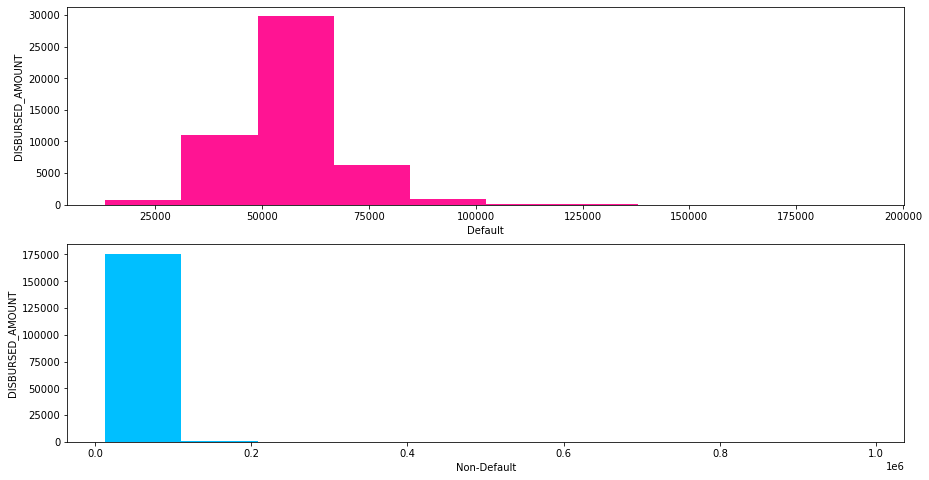

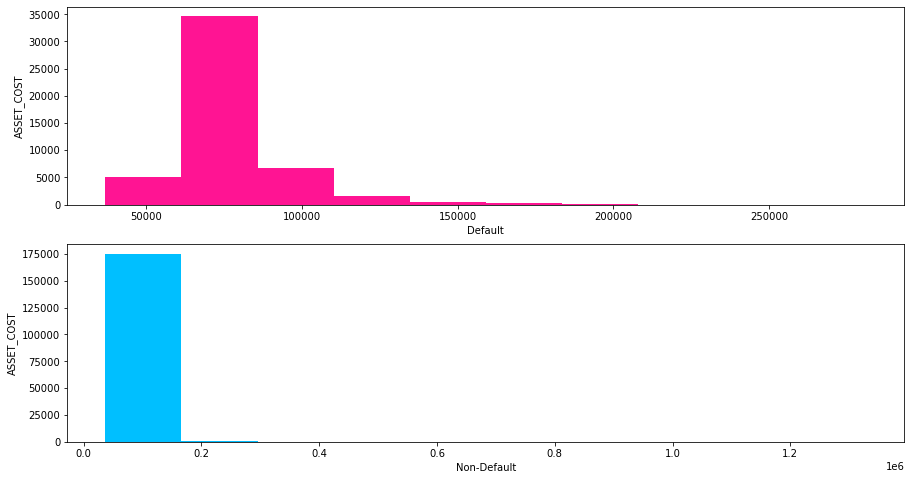

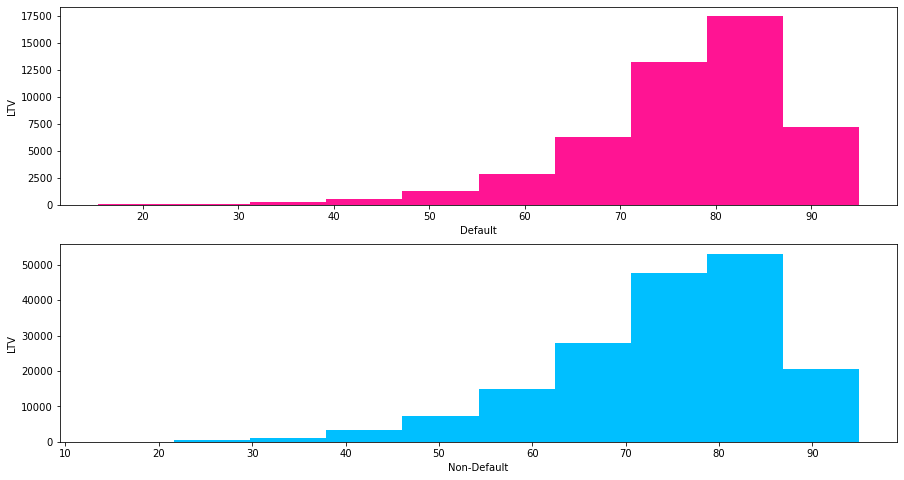

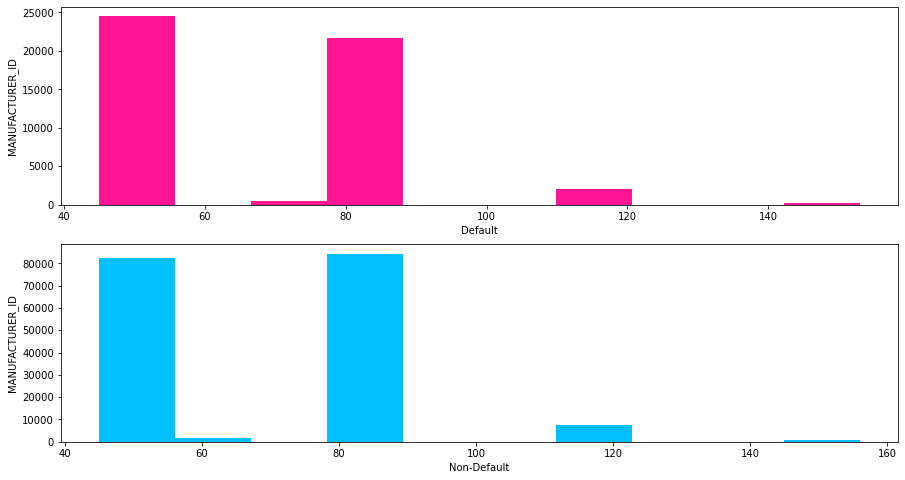

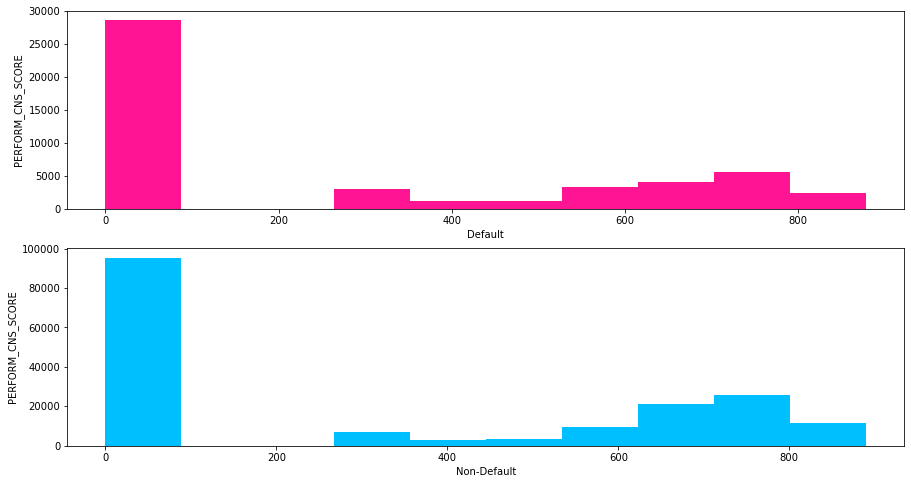

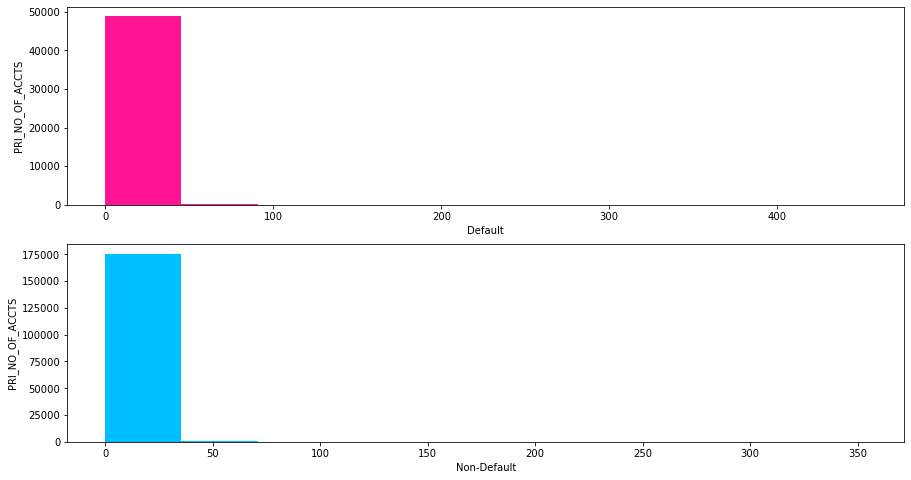

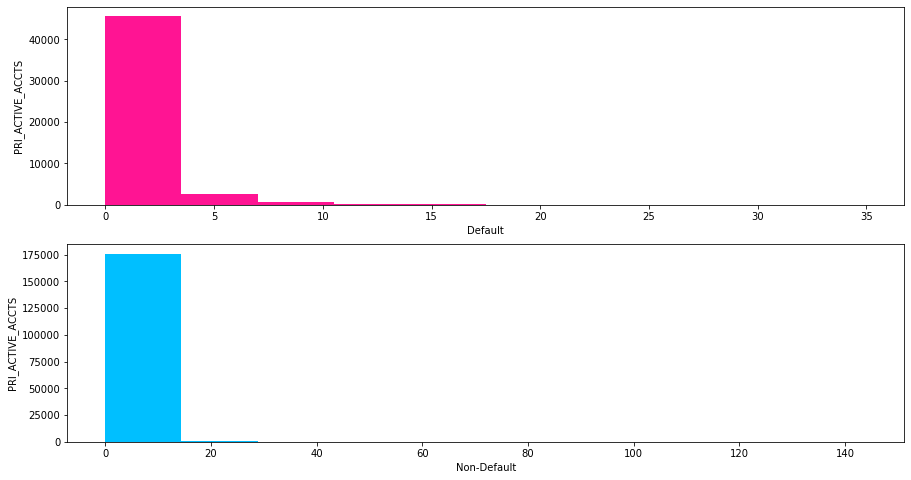

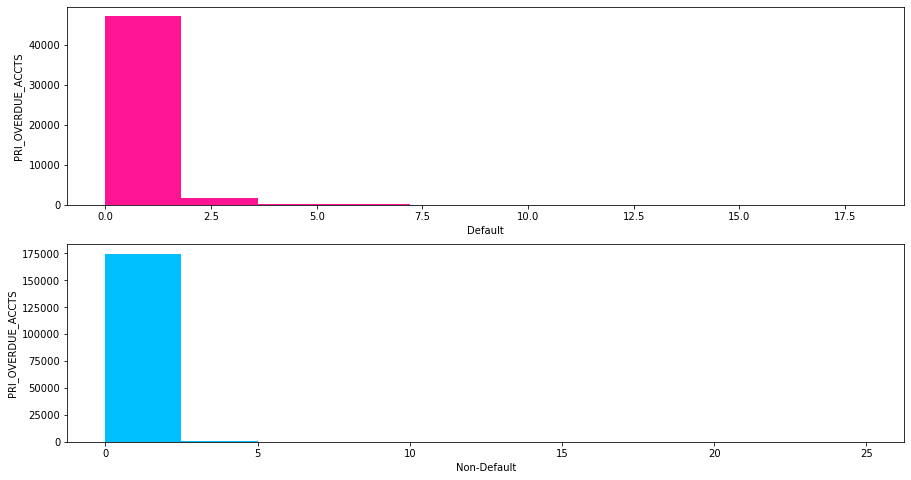

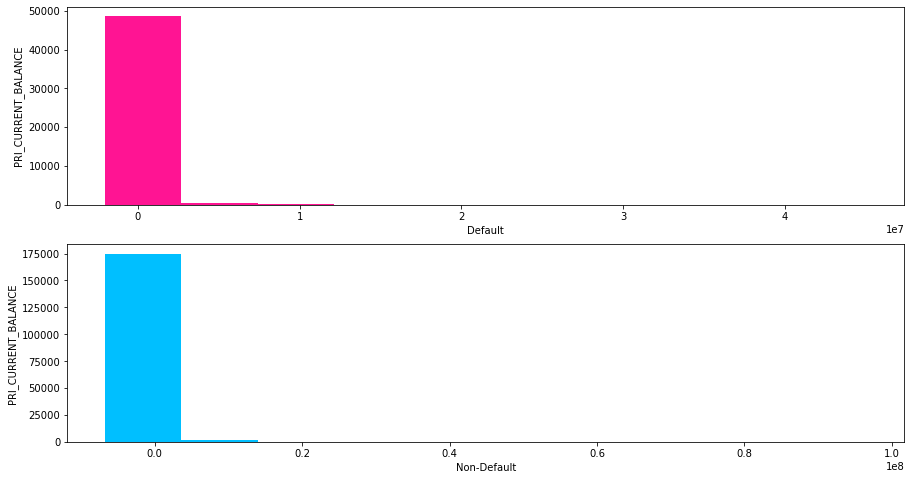

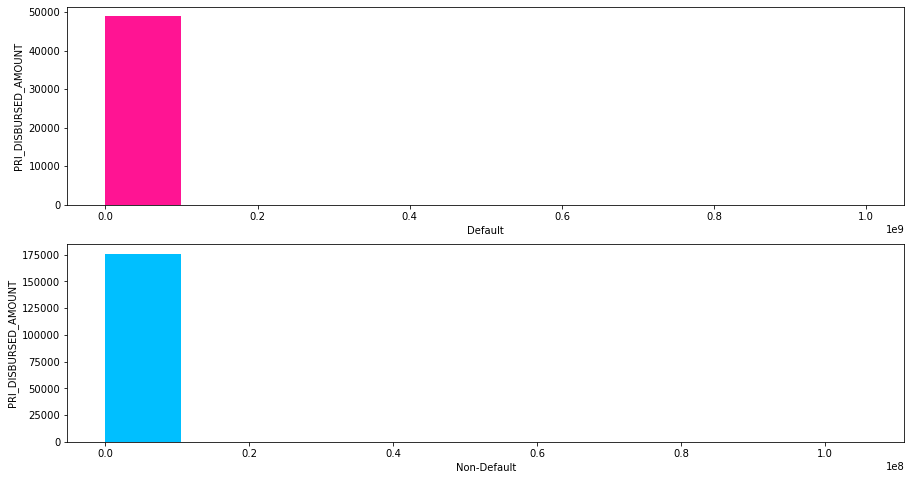

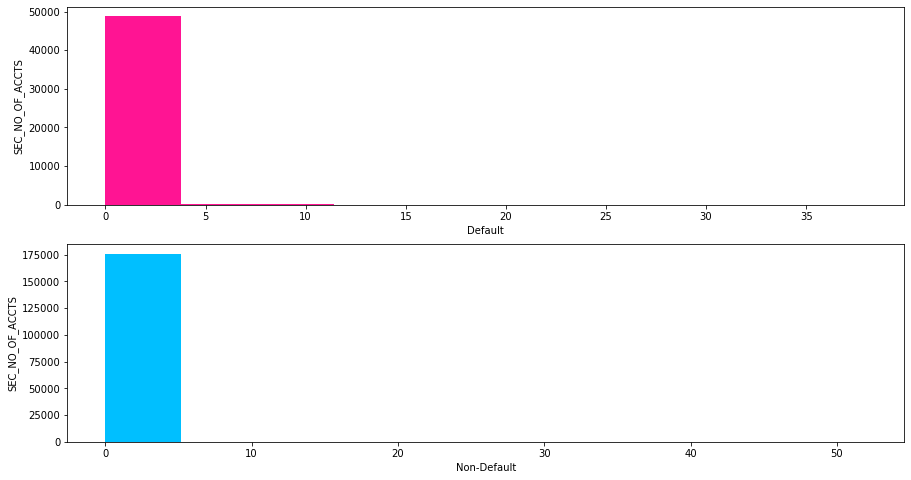

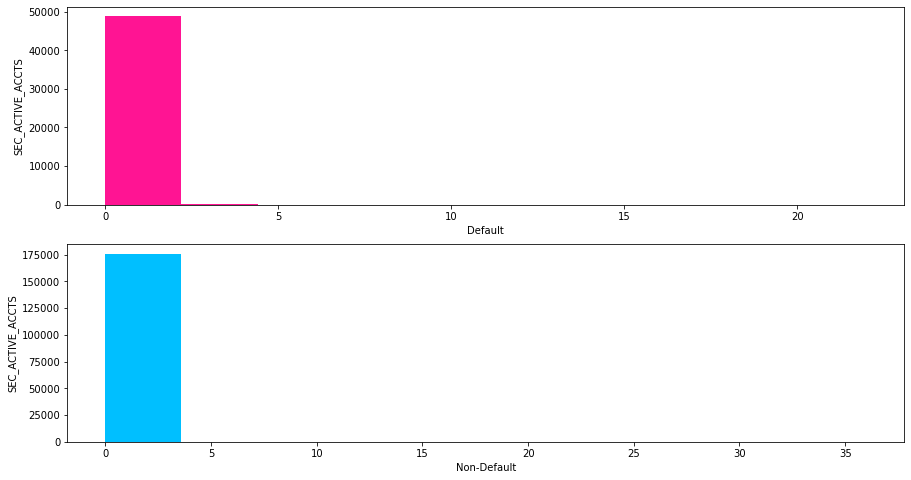

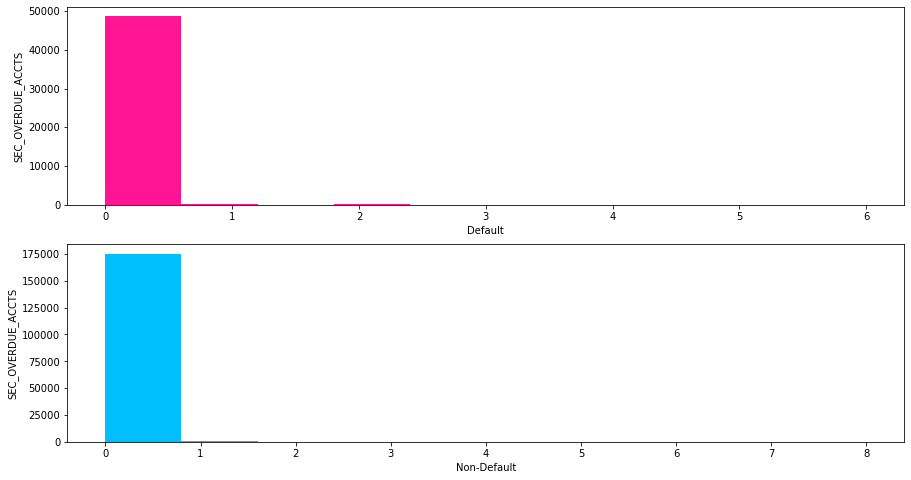

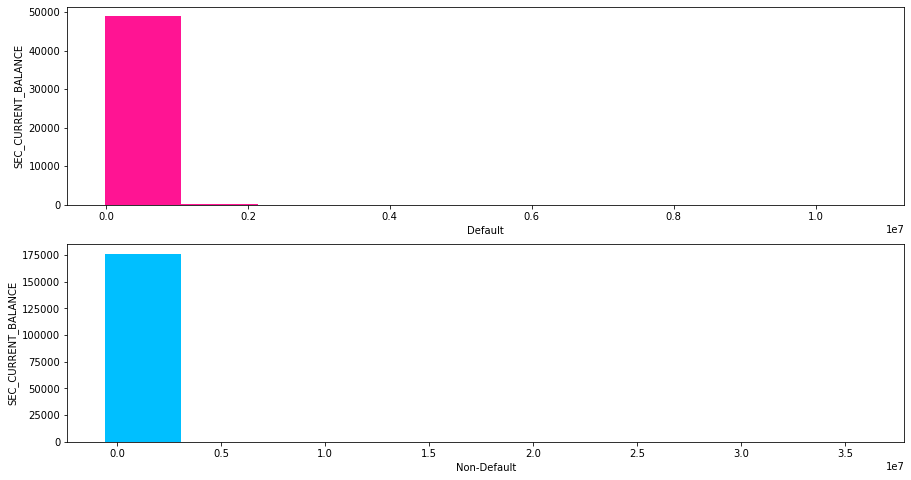

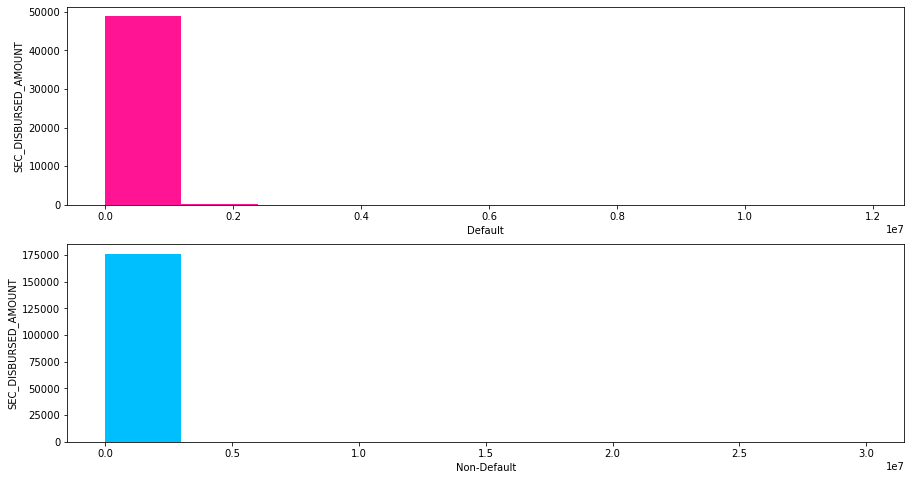

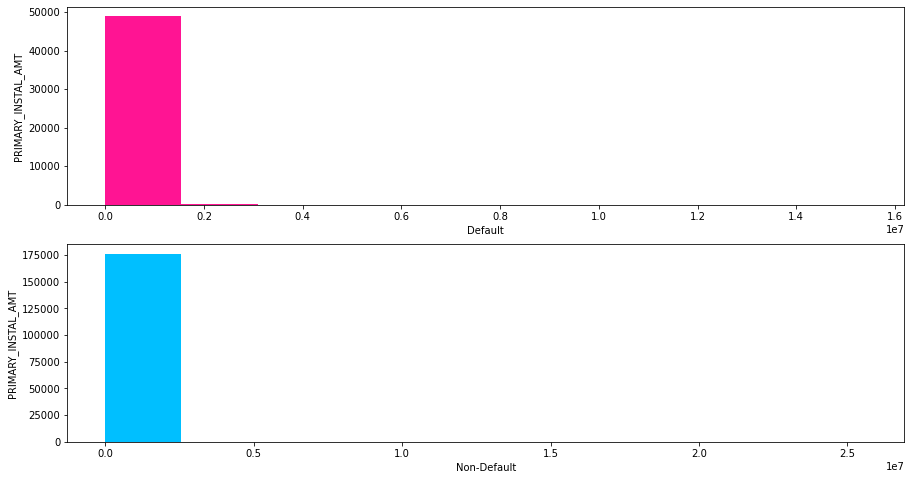

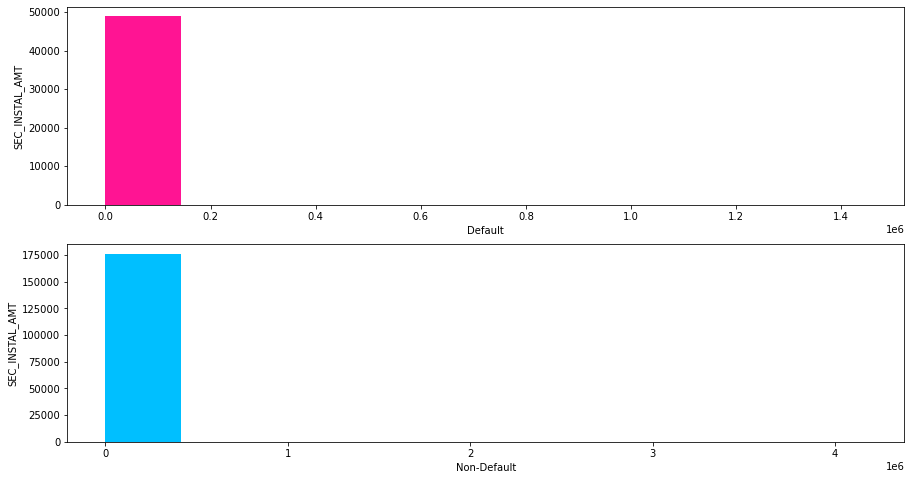

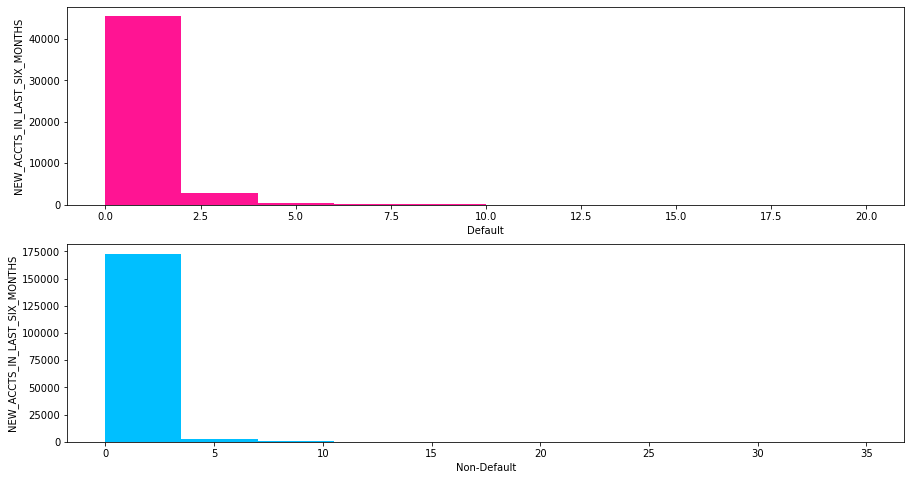

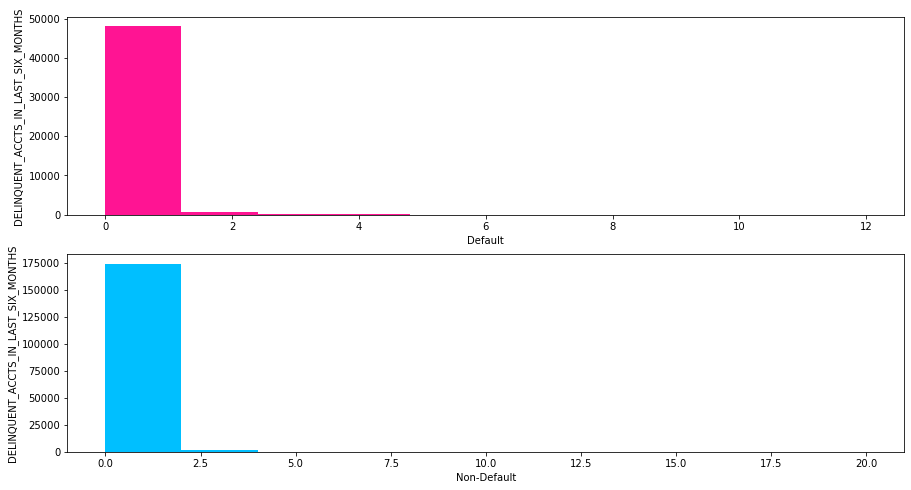

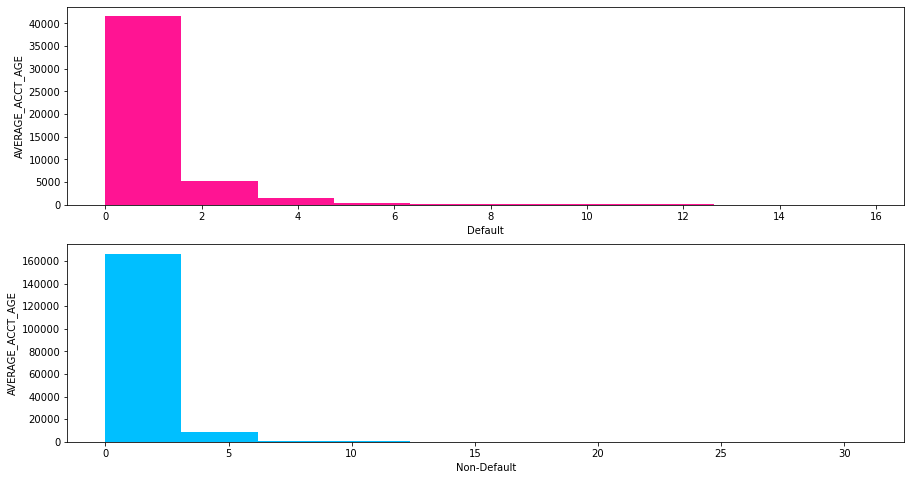

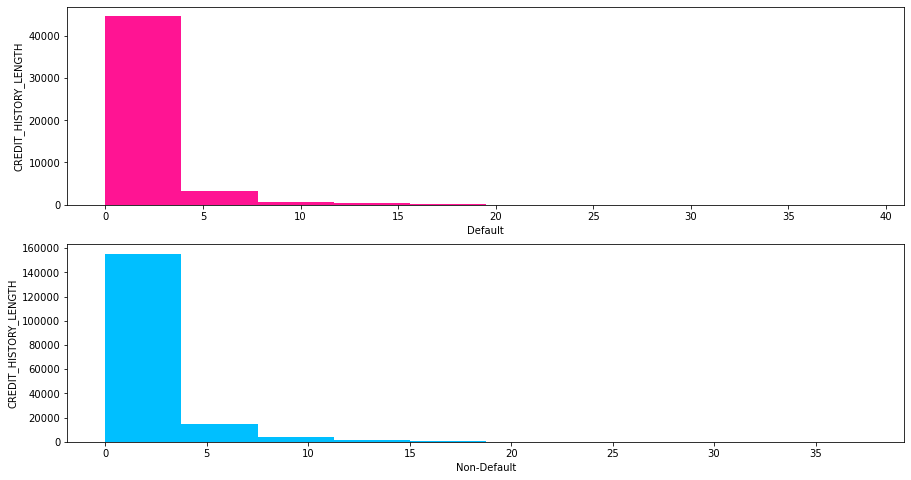

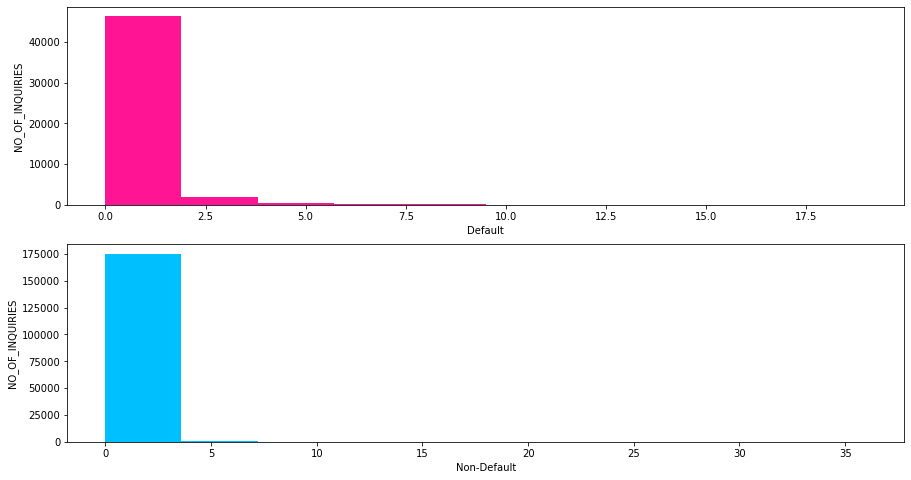

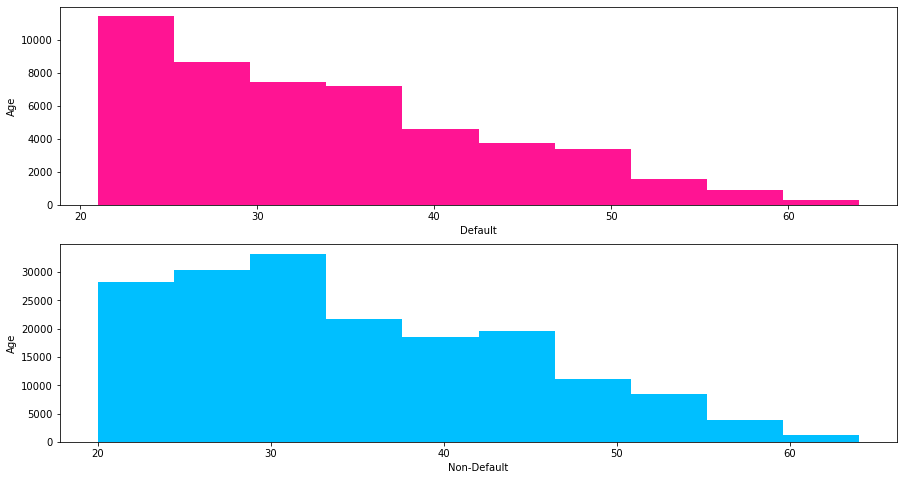

In [57]:
for i in df_num.columns:
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8))

    ax1.hist(df[i][df.LOAN_DEFAULT == 1], color = 'deeppink')
    ax1.set(xlabel = 'Default', ylabel=i)

    ax2.hist(df[i][df.LOAN_DEFAULT == 0], color = 'deepskyblue')
    ax2.set(xlabel = 'Non-Default', ylabel=i)

1. `Disbursed Amount`
   The graph indicates that default happens mostly for disbursed amount greater than 20000. The default frequency is maximum when the disbursed amount ranges from 50000 to 75000.
   
2. `Asset Cost`
   It is similar to disbursed amount.the graph indicates that default happens mostly for asset cost within the range of 40000-120000. The default frequency is maximum when the disbursed amount ranges from 60000 to 80000

3. `Age`
   Number of defaulters decrease with increase in age. Maximum number of defaulters are around the age 20 and maximum number of non defaulters are around age 30. So, there might be a slight possibility that a certain defaulters around age 20 being converted to non defaulters in the next 5-10 years

4. The columns which are related to accounts ,manufacturer_id,and LTV don't have a significant impact on the target variable.

##  Outlier Analysis and Treatment

In [32]:
df.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'MANUFACTURER_ID',
       'EMPLOYMENT_TYPE', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age'],
      dtype='object')

In [29]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(exclude = np.number)

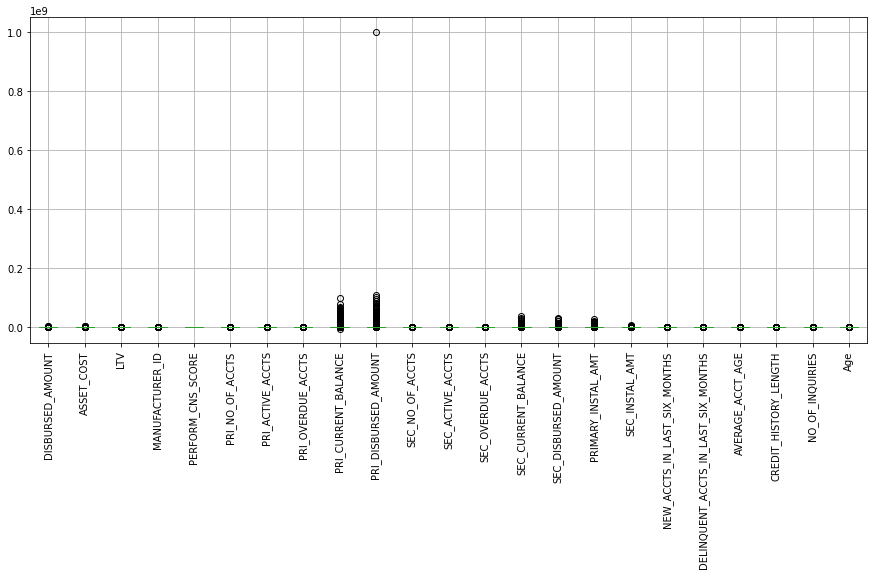

In [42]:
plt.figure(figsize=(15,6))
df_num.boxplot()
plt.xticks(rotation=90)
plt.show()

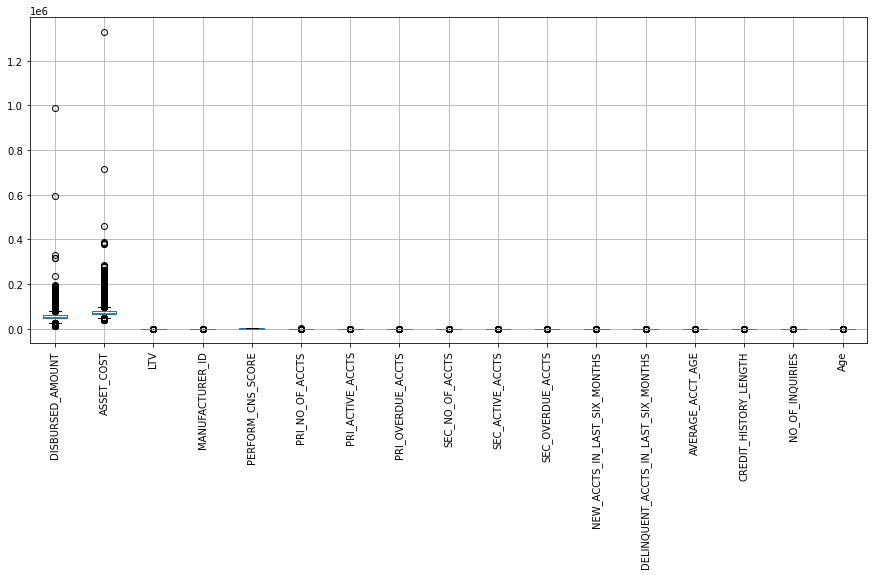

In [61]:
plt.figure(figsize=(15,6))
df_num.drop(['PRI_DISBURSED_AMOUNT','PRI_CURRENT_BALANCE'
             ,'SEC_DISBURSED_AMOUNT','SEC_CURRENT_BALANCE','PRIMARY_INSTAL_AMT'
             ,'SEC_INSTAL_AMT'],axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

**There are Outliers present in most of the variables. So we can check the distribution of outliers using skewness check and take appropriate decisions**

In [34]:
# Skewness Check 
df.skew()

DISBURSED_AMOUNT                         3.070243
ASSET_COST                               4.056725
LTV                                     -1.075961
MANUFACTURER_ID                          0.386223
AADHAR_FLAG                             -1.831456
PAN_FLAG                                 3.162348
VOTERID_FLAG                             1.991999
DRIVING_FLAG                             6.260860
PERFORM_CNS_SCORE                        0.422627
PRI_NO_OF_ACCTS                          9.854038
PRI_ACTIVE_ACCTS                         5.375050
PRI_OVERDUE_ACCTS                        7.482740
PRI_CURRENT_BALANCE                     29.241334
PRI_DISBURSED_AMOUNT                   318.232216
SEC_NO_OF_ACCTS                         27.827385
SEC_ACTIVE_ACCTS                        30.393303
SEC_OVERDUE_ACCTS                       24.001274
SEC_CURRENT_BALANCE                    106.951351
SEC_DISBURSED_AMOUNT                    74.679484
PRIMARY_INSTAL_AMT                      71.487198


**Most of the variable are skewed.So we need to apply transformation to reduct the skewness**

In [30]:
# Square Root Transformation
df_num = np.sqrt(df_num)

In [31]:
# Skewness Check
df_num.skew()

DISBURSED_AMOUNT                        0.359827
ASSET_COST                              1.984557
LTV                                    -1.409775
MANUFACTURER_ID                         0.195781
PERFORM_CNS_SCORE                       0.270525
PRI_NO_OF_ACCTS                         1.418726
PRI_ACTIVE_ACCTS                        1.117904
PRI_OVERDUE_ACCTS                       2.916276
PRI_CURRENT_BALANCE                     4.401003
PRI_DISBURSED_AMOUNT                    5.883512
SEC_NO_OF_ACCTS                         8.981128
SEC_ACTIVE_ACCTS                        9.865176
SEC_OVERDUE_ACCTS                      14.421063
SEC_CURRENT_BALANCE                    24.527884
SEC_DISBURSED_AMOUNT                   20.628855
PRIMARY_INSTAL_AMT                      8.686241
SEC_INSTAL_AMT                         37.976240
NEW_ACCTS_IN_LAST_SIX_MONTHS            1.865611
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS     3.462114
AVERAGE_ACCT_AGE                        1.012610
CREDIT_HISTORY_LENGT

In [32]:
# Checking first five rows
df_num.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age
0,224.895531,241.660919,9.463086,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.830952
1,217.128994,256.027342,8.557453,6.708204,24.454039,1.000000,1.0,1.0,166.132477,224.053565,0.0,0.0,0.0,0.0,0.0,44.620623,0.0,0.0,1.0,1.053565,1.053565,0.0,5.744563
2,230.820276,247.709507,9.467312,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.744563
3,239.818682,257.124483,9.406381,6.708204,17.464249,1.732051,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.567764,0.0,0.0,0.0,0.894427,1.140175,1.0,5.000000
4,228.862404,245.560583,9.401596,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,6.403124


**Interpretation** As we can see skewness of all numerical variables have been reduced after square root transformation.

Here we implemented simple transformation strategy, but in future, while model building we would tranform each variable with different strategy or same based on the validity of assumptions, that are required before building parametric classification models.

In [33]:
df_new = pd.concat([df_num,df_cat],axis=1)

df_new.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,LOAN_DEFAULT
0,224.895531,241.660919,9.463086,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.830952,Salaried,1,0,0,0,0
1,217.128994,256.027342,8.557453,6.708204,24.454039,1.000000,1.0,1.0,166.132477,224.053565,0.0,0.0,0.0,0.0,0.0,44.620623,0.0,0.0,1.0,1.053565,1.053565,0.0,5.744563,Self employed,1,0,0,0,1
2,230.820276,247.709507,9.467312,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.744563,Self employed,1,0,0,0,0
3,239.818682,257.124483,9.406381,6.708204,17.464249,1.732051,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.567764,0.0,0.0,0.0,0.894427,1.140175,1.0,5.000000,Self employed,1,0,0,0,1
4,228.862404,245.560583,9.401596,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,6.403124,Self employed,1,0,0,0,1


# Missing Value Check once

In [34]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_new.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_new.isnull().sum()*100/len(df_new)).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
PRI_CURRENT_BALANCE,436,0.193564
SEC_CURRENT_BALANCE,60,0.026637
LOAN_DEFAULT,0,0.000000
ASSET_COST,0,0.000000
LTV,0,0.000000
MANUFACTURER_ID,0,0.000000
PERFORM_CNS_SCORE,0,0.000000
PRI_NO_OF_ACCTS,0,0.000000
PRI_ACTIVE_ACCTS,0,0.000000
PRI_OVERDUE_ACCTS,0,0.000000


In [35]:
# Dropping the Rows That have Null Values
df_new.dropna(subset= ['PRI_CURRENT_BALANCE'],axis=0,inplace=True)
df_new.dropna(subset= ['SEC_CURRENT_BALANCE'],axis=0,inplace=True)

In [36]:
df_new.isnull().sum().sum()

0

In [148]:
df_new.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,LOAN_DEFAULT
0,224.895531,241.660919,9.463086,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.830952,Salaried,1,0,0,0,0
1,217.128994,256.027342,8.557453,6.708204,24.454039,1.000000,1.0,1.0,166.132477,224.053565,0.0,0.0,0.0,0.0,0.0,44.620623,0.0,0.0,1.0,1.053565,1.053565,0.0,5.744563,Self employed,1,0,0,0,1
2,230.820276,247.709507,9.467312,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.744563,Self employed,1,0,0,0,0
3,239.818682,257.124483,9.406381,6.708204,17.464249,1.732051,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.567764,0.0,0.0,0.0,0.894427,1.140175,1.0,5.000000,Self employed,1,0,0,0,1
4,228.862404,245.560583,9.401596,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,6.403124,Self employed,1,0,0,0,1


**No Missing values present now**

In [149]:
# Converting Back Flag features to Integer for Model Building

In [37]:
df_new[['AADHAR_FLAG','PAN_FLAG','VOTERID_FLAG','DRIVING_FLAG','LOAN_DEFAULT']] = df_new[['AADHAR_FLAG',
                                                    'PAN_FLAG','VOTERID_FLAG','DRIVING_FLAG','LOAN_DEFAULT']].astype('int') 

In [38]:
# Separating Numerical and categorical features for train test split
df_num = df_new.select_dtypes(include = np.number)
df_cat = df_new.select_dtypes(exclude = np.number)
df_num.drop('LOAN_DEFAULT',axis=1,inplace=True)

In [39]:
# Checking first five observation of Numerical data
df_num.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG
0,224.895531,241.660919,9.463086,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.830952,1,0,0,0
1,217.128994,256.027342,8.557453,6.708204,24.454039,1.000000,1.0,1.0,166.132477,224.053565,0.0,0.0,0.0,0.0,0.0,44.620623,0.0,0.0,1.0,1.053565,1.053565,0.0,5.744563,1,0,0,0
2,230.820276,247.709507,9.467312,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.744563,1,0,0,0
3,239.818682,257.124483,9.406381,6.708204,17.464249,1.732051,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.567764,0.0,0.0,0.0,0.894427,1.140175,1.0,5.000000,1,0,0,0
4,228.862404,245.560583,9.401596,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,6.403124,1,0,0,0


In [40]:
# Checking first five observations of Categorical features
df_cat.head()

,EMPLOYMENT_TYPE
0,Salaried
1,Self employed
2,Self employed
3,Self employed
4,Self employed


In [41]:
# Converting category features to One hot Dummy Encoding
encoded_data = pd.get_dummies(data = df_cat , drop_first=True)

In [42]:
# Concatenating dummy encoded data and numerical data
X = pd.concat([df_num,encoded_data],axis=1)

y = df_new['LOAN_DEFAULT']

In [48]:
X.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,EMPLOYMENT_TYPE_Self employed
0,224.895531,241.660919,9.463086,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.830952,1,0,0,0,0
1,217.128994,256.027342,8.557453,6.708204,24.454039,1.000000,1.0,1.0,166.132477,224.053565,0.0,0.0,0.0,0.0,0.0,44.620623,0.0,0.0,1.0,1.053565,1.053565,0.0,5.744563,1,0,0,0,1
2,230.820276,247.709507,9.467312,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,5.744563,1,0,0,0,1
3,239.818682,257.124483,9.406381,6.708204,17.464249,1.732051,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.567764,0.0,0.0,0.0,0.894427,1.140175,1.0,5.000000,1,0,0,0,1
4,228.862404,245.560583,9.401596,6.708204,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,6.403124,1,0,0,0,1


# Train Test Split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train :',y_train.shape)
print('y_test : ',y_test.shape)

X_train :  (157327, 28)
X_test :  (67426, 28)
y_train : (157327,)
y_test :  (67426,)


In [44]:
# Scaling the training and test data
ss= StandardScaler()

# fit transform for training data
X_train = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)

# transform for test data . as we need to calcualte zscore using training data mean and std
X_test = pd.DataFrame(ss.transform(X_test),columns = X_test.columns)

In [45]:
# Sanity for X_train after scaling

X_train.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,EMPLOYMENT_TYPE_Self employed
0,0.056618,-0.786273,1.224670,0.803930,-0.608781,0.016482,0.469803,-0.346479,-0.248563,-0.288196,-0.144473,-0.120568,-0.073134,-0.077636,-0.086364,-0.020234,-0.059983,1.296277,-0.286012,-0.335756,-0.455082,1.957424,1.109184,0.441510,-0.288881,-0.417200,-0.156496,0.873535
1,1.927691,1.293574,0.689086,0.803930,-0.916069,-0.801107,-0.751455,-0.346479,-0.460468,-0.492029,-0.144473,-0.120568,-0.073134,-0.077636,-0.086364,-0.354980,-0.059983,-0.505580,-0.286012,-0.816472,-0.806309,-0.375167,2.314925,-2.264955,-0.288881,2.396932,-0.156496,0.873535
2,0.434273,-0.185639,0.749163,0.803930,1.195070,1.027078,0.469803,-0.346479,-0.248989,-0.198433,-0.144473,-0.120568,-0.073134,-0.077636,-0.086364,0.505888,-0.059983,1.296277,-0.286012,0.455383,0.247372,-0.375167,1.732413,0.441510,-0.288881,-0.417200,-0.156496,0.873535
3,0.815966,1.342099,-0.366627,-0.961712,-0.916069,-0.801107,-0.751455,-0.346479,-0.460468,-0.492029,-0.144473,-0.120568,-0.073134,-0.077636,-0.086364,-0.354980,-0.059983,-0.505580,-0.286012,-0.816472,-0.806309,-0.375167,-1.260767,-2.264955,-0.288881,2.396932,-0.156496,0.873535
4,0.221766,0.160518,0.153268,0.803930,-0.916069,-0.801107,-0.751455,-0.346479,-0.460468,-0.492029,-0.144473,-0.120568,-0.073134,-0.077636,-0.086364,-0.354980,-0.059983,-0.505580,-0.286012,-0.816472,-0.806309,-0.375167,-0.764660,-2.264955,3.461635,2.396932,-0.156496,0.873535


In [46]:
# Sanity Check after X_test after scaling

X_test.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,EMPLOYMENT_TYPE_Self employed
0,1.179174,1.303181,-0.149804,-0.801195,-0.916069,-0.801107,-0.751455,-0.346479,-0.460468,-0.492029,-0.144473,-0.120568,-0.073134,-0.077636,-0.086364,-0.354980,-0.059983,-0.505580,-0.286012,-0.816472,-0.806309,-0.375167,0.127526,0.44151,-0.288881,-0.417200,6.389927,-1.144774
1,0.325763,-0.168394,0.615364,2.069271,1.246623,2.569899,2.479689,-0.346479,0.159767,0.318813,-0.144473,-0.120568,-0.073134,-0.077636,-0.086364,-0.057246,-0.059983,5.470504,-0.286012,0.625676,1.152392,5.338492,-0.646495,0.44151,-0.288881,-0.417200,-0.156496,-1.144774
2,0.847119,-0.084133,1.229927,0.803930,-0.916069,-0.801107,-0.751455,-0.346479,-0.460468,-0.492029,-0.144473,-0.120568,-0.073134,-0.077636,-0.086364,-0.354980,-0.059983,-0.505580,-0.286012,-0.816472,-0.806309,-0.375167,-0.304132,0.44151,-0.288881,-0.417200,-0.156496,0.873535
3,0.744041,0.297896,0.604349,-1.127329,1.142227,0.834071,0.975664,-0.346479,-0.141775,-0.016129,-0.144473,-0.120568,-0.073134,-0.077636,-0.086364,-0.354980,-0.059983,-0.505580,-0.286012,0.916774,0.841092,-0.375167,-0.646495,0.44151,-0.288881,-0.417200,-0.156496,0.873535
4,0.294518,1.188952,-1.098268,-0.801195,1.106750,0.614999,0.975664,-0.346479,2.346199,2.030279,5.768631,-0.120568,-0.073134,-0.077636,-0.086364,0.500774,5.613861,-0.505580,3.030660,1.727238,2.153183,-0.375167,0.633739,0.44151,-0.288881,2.396932,-0.156496,0.873535


In [68]:
# user define function for dashboard update

train_score_card = pd.DataFrame(columns=['Model Name','Precision','Recall','Weighted_F1_Score','Accuracy','ROC_AUC_SCORE'])
def update_train_scorecard(name,prec,recall,f1,acc,roc_score):
    global train_score_card
    train_score_card = train_score_card.append({'Model Name':name, 'Precision':prec, 'Recall':recall, 'Weighted_F1_Score':f1, 'Accuracy':acc,'ROC_AUC_SCORE':roc_score},
                                  ignore_index=True)

In [69]:
# user define function for dashboard update

test_score_card = pd.DataFrame(columns=['Model Name','Precision','Recall','Weighted_F1_Score','Accuracy','ROC_AUC_SCORE'])
def update_test_scorecard(name,prec,recall,f1,acc,roc_score):
    global test_score_card
    test_score_card = test_score_card.append({'Model Name':name, 'Precision':prec, 'Recall':recall, 'Weighted_F1_Score':f1, 'Accuracy':acc,'ROC_AUC_SCORE':roc_score},
                                  ignore_index=True)

# Logistic Regression

In [53]:
# importing Logistic Regression library
from  sklearn.linear_model import LogisticRegression

# importing metrics for classification report
from sklearn import metrics

In [54]:
logreg = LogisticRegression()

logreg_model = logreg.fit(X_train,y_train)

In [55]:
# Checking the accuracy score of the traning data set
logreg_model.score(X_train,y_train)

0.7823768329657338

In [56]:
# Checking the accuracy score of the test data set

logreg_model.score(X_test,y_test)

0.7829472310384719

#### Accuracy looks good for training and  test data set but accuracy is not the correct parameter due to accuracy paradox

In [57]:
# Retrieving predicted value of the training data set
y_train_pred = logreg_model.predict(X_train)

# Retrieving predicted value of the test data set
y_test_pred = logreg_model.predict(X_test)

In [58]:
# Displaying classification report for traning data
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    123105
           1       0.47      0.00      0.01     34222

    accuracy                           0.78    157327
   macro avg       0.63      0.50      0.44    157327
weighted avg       0.71      0.78      0.69    157327



In [59]:
# Displaying classification report for test data

print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     52802
           1       0.45      0.00      0.01     14624

    accuracy                           0.78     67426
   macro avg       0.62      0.50      0.44     67426
weighted avg       0.71      0.78      0.69     67426



In [90]:
# F1 score is 0.69 for training and test data, we can take decision based on ROC_AUC Score

In [60]:
# Retrieving Probability 
y_pred_prob = logreg_model.predict_proba(X_train)
y_pred_prob = y_pred_prob[:,1]

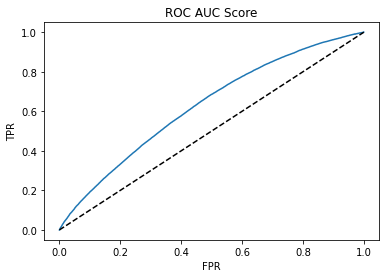

In [61]:
fpr,tpr,threshold = metrics.roc_curve(y_train,y_pred_prob)


plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Score')
plt.show()

In [62]:
metrics.roc_auc_score(y_train,y_pred_prob)

0.627431326385059

In [70]:
update_train_scorecard('Base Logistic Regression',0.28,0.63,0.61,0.78,0.62)

In [79]:
update_test_scorecard('Base Logistic Regression',0.28,0.63,0.61,0.78,0.62)

**ROC AUC score seems to be 0.62.So Model needs to be improved further**

In [94]:
# Using Youdens Index for Optimal value of Threshold

In [63]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.683420,0.497120,0.211107,0.186300
1,0.683332,0.497047,0.211121,0.186285
2,0.683362,0.497080,0.211113,0.186282
3,0.683391,0.497112,0.211109,0.186279
4,0.676787,0.490516,0.212328,0.186271


In [64]:
y_train_pred_prob  = logreg_model.predict_proba(X_train)
y_train_pred_prob = y_train_pred_prob[:,1]

In [65]:
# Making 0 if prob <0.22 else 1
y_train_pred = [0 if x < 0.22 else 1 for x in y_train_pred_prob]

In [66]:
# Displaying classification report for traning data

print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.55      0.67    123105
           1       0.28      0.63      0.39     34222

    accuracy                           0.57    157327
   macro avg       0.56      0.59      0.53    157327
weighted avg       0.72      0.57      0.61    157327



In [67]:
y_test_pred_prob  = logreg_model.predict_proba(X_test)
y_test_pred_prob = y_test_pred_prob[:,1]

In [68]:
y_test_pred = [0 if x < 0.22 else 1 for x in y_test_pred_prob]

In [69]:
# Displaying classification report for test data

print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67     52802
           1       0.28      0.63      0.39     14624

    accuracy                           0.57     67426
   macro avg       0.56      0.59      0.53     67426
weighted avg       0.72      0.57      0.61     67426



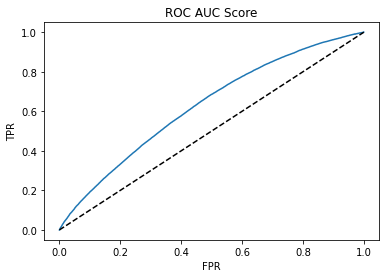

In [70]:
fpr,tpr,threshold = metrics.roc_curve(y_train,y_train_pred_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Score')
plt.show()

In [71]:
metrics.roc_auc_score(y_train,y_pred_prob)

0.627431326385059

**ROC AUC score seems to be 0.62.So Model needs to be improved further by trying Other Algorithmns like KNN ,Decision Tree,Random Forest,Boosting Algorithmns**

# K-Nearest Neighbour

In [72]:
# importing knn-classifiers
from sklearn.neighbors import KNeighborsClassifier

In [73]:
from sklearn.model_selection import GridSearchCV

In [106]:
#params = {'n_neighbors':np.arange(1,11),'p':[1,2,3],'weights':['uniform','distance']}
#grid_src = GridSearchCV(estimator=KNeighborsClassifier() ,
#                       param_grid=params,cv=5,scoring='f1_weighted')
#grid_src.fit(X_train,y_train)

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=4,p=2,weights='distance')
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [1]:
# y_train_pred = knn_model.predict(X_train)
# y_test_pred = knn_model.predict(X_test)

# print('Train Classification Report:')
# print(metrics.classification_report(y_train,y_train_pred))
# print('Test Classification Report:')
# print(metrics.classification_report(y_test,y_test_pred))

In [71]:
update_train_scorecard('Base KNN',0.28,0.63,0.61,0.59,0.62)

In [80]:
update_test_scorecard('Base KNN',0.28,0.63,0.61,0.59,0.62)

### To Do Next :

1. Overfitted Model.Need to Hypertune paramaters using GridSearchCV
2. Further Model can be improved by using Recursive Feature Elimination to take the best features and build Models
3. Sampling needs to be done
4. Decision Trees , Random Forest and Boosting algorithmns needs to be implemented to improve the model performance

# SMOTE PROCESS

In [ ]:
# To balance the classes of the target variable, we use SMOTE(Synthetic Minority Over Sampling Technique)

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
oversample = SMOTE()

X,y = oversample.fit_resample(X,y)

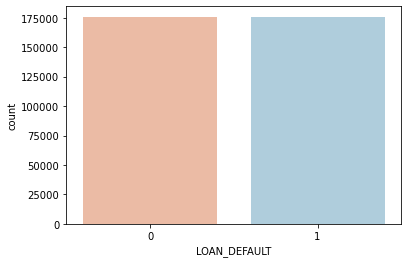

In [75]:
sns.countplot(y,palette='RdBu')
plt.show()

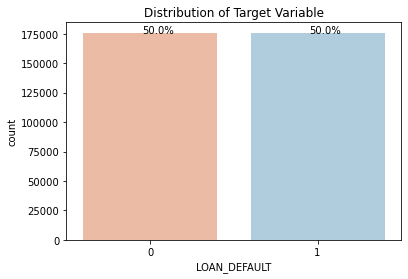

In [76]:
sns.countplot(y,palette='RdBu')
plt.title('Distribution of Target Variable')
plt.text(x = -0.05, y = y.value_counts()[0] + 1, 
         s = str(round((y.value_counts()[0])*100/len(y),2)) + '%')
plt.text(x = 0.95, y = y.value_counts()[1] +1, 
         s = str(round((y.value_counts()[1])*100/len(y),2)) + '%')
plt.show()

In [ ]:
# The classes are balanced in the target variable

In [77]:
X.shape

(351814, 28)

In [78]:
y.shape

(351814,)

In [79]:
# Splitting the data into train and test


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train :',y_train.shape)
print('y_test : ',y_test.shape)

X_train :  (246269, 28)
X_test :  (105545, 28)
y_train : (246269,)
y_test :  (105545,)


In [80]:
# Scaling the training and test data
ss= StandardScaler()

# fit transform for training data
X_train = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)

# transform for test data . as we need to calcualte zscore using training data mean and std
X_test = pd.DataFrame(ss.transform(X_test),columns = X_test.columns)

### Decision Making Parameter considered here : Recall

1. As per the definition of recall, it gives the true positive rates by considering actual positives in the report and false negatives
2. Since we need to reduce the loan defaulters, we have to reduce the rate of predicting defaulters as non defaulters.

# Recursive Feature Elimintaion

In [94]:
# Importing RFE to select the most significant features
from sklearn.feature_selection import RFE

In [95]:
rfe_model = RFE(estimator = LogisticRegression(),n_features_to_select=15)
rfe_model.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [97]:
# We are extracting the best features as per the rankings 
best_feature =  pd.DataFrame()

best_feature['Features'] = X_train.columns
best_feature['Ranking']= rfe_model.ranking_

best_features_list = list(best_feature[best_feature['Ranking'] ==1]['Features'])

In [140]:
best_features_list

['DISBURSED_AMOUNT',
 'ASSET_COST',
 'LTV',
 'MANUFACTURER_ID',
 'PRI_NO_OF_ACCTS',
 'PRI_OVERDUE_ACCTS',
 'PRI_DISBURSED_AMOUNT',
 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'CREDIT_HISTORY_LENGTH',
 'NO_OF_INQUIRIES',
 'AADHAR_FLAG',
 'PAN_FLAG',
 'VOTERID_FLAG',
 'DRIVING_FLAG',
 'EMPLOYMENT_TYPE_Self employed']

In [98]:
# Selecting the best features in X train by removing the insignificant ones

X_train[best_features_list].head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS,PRI_DISBURSED_AMOUNT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,EMPLOYMENT_TYPE_Self employed
0,-0.251377,-0.236752,-0.141319,-1.139680,-0.792149,-0.38005,-0.484176,-0.317922,-0.801562,-0.401978,0.500579,-0.240477,-0.374895,-0.126188,0.968329
1,-0.444767,-0.263173,-0.384826,-1.139680,-0.792149,-0.38005,-0.484176,-0.317922,-0.801562,-0.401978,0.500579,-0.240477,2.667415,-0.126188,0.968329
2,0.057906,0.034189,-0.028082,-0.913316,0.665126,-0.38005,0.360855,-0.317922,1.528138,-0.401978,0.500579,-0.240477,-0.374895,-0.126188,0.968329
3,0.407475,0.242293,0.364827,-0.943495,-0.792149,-0.38005,-0.484176,-0.317922,-0.801562,-0.401978,0.500579,-0.240477,-0.374895,-0.126188,0.968329
4,0.318335,-0.333799,0.866294,0.850466,-0.792149,-0.38005,-0.484176,-0.317922,-0.801562,-0.401978,0.500579,-0.240477,-0.374895,-0.126188,-1.032707


# Logistic Regression

In [99]:
# Applying Logistic Regression on the best parameters

logreg_best = LogisticRegression()
logreg_sampled_model = logreg_best.fit(X_train[best_features_list],y_train)

In [100]:
print('Train Accuracy : ',logreg_sampled_model.score(X_train[best_features_list],y_train))
print('Test Accuracy : ',logreg_sampled_model.score(X_test[best_features_list],y_test))

Train Accuracy :  0.6353215386427037
Test Accuracy :  0.6334170259131177


In [101]:
train_pred = logreg_sampled_model.predict(X_train[best_features_list])
test_pred = logreg_sampled_model.predict(X_test[best_features_list])

In [102]:
# Classification report of train

print('Classification report of Training Set : \n')
print(metrics.classification_report(y_train,train_pred))

Classification report of Training Set : 

              precision    recall  f1-score   support

           0       0.64      0.63      0.63    123305
           1       0.63      0.64      0.64    122964

    accuracy                           0.64    246269
   macro avg       0.64      0.64      0.64    246269
weighted avg       0.64      0.64      0.64    246269



In [103]:
# Classification report of Test

print('Classification report of Test Set : \n')
print(metrics.classification_report(y_test,test_pred))

Classification report of Test Set : 

              precision    recall  f1-score   support

           0       0.63      0.63      0.63     52602
           1       0.63      0.64      0.63     52943

    accuracy                           0.63    105545
   macro avg       0.63      0.63      0.63    105545
weighted avg       0.63      0.63      0.63    105545



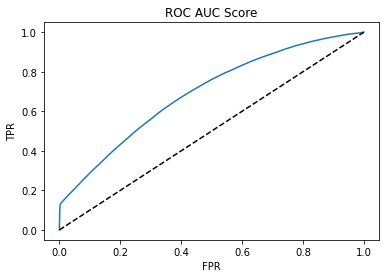

AUC SCORE : 0.6930535195931566


In [104]:
train_prob = logreg_sampled_model.predict_proba(X_train[best_features_list])
train_prob = train_prob[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,train_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Score')
plt.show()
print('AUC SCORE :',metrics.roc_auc_score(y_train,train_prob))

In [72]:
update_train_scorecard('Logistics Regression After RFE',0.63,0.64,0.64,0.63,0.69)

In [81]:
update_test_scorecard('Logistics Regression After RFE',0.63,0.64,0.63,0.63,0.69)

### Observation :

1. `Accuracy` : The accuracy is reduced after applying smote and rfe because initially the data in target variable was imbalanced. Hence the accuracy was high initially
2. `Classification Report` : Recall is increased in this model since it is built with significant features
3. `ROC AUC Score` : There is a slight increment in the roc auc score when compared to the previous model

# Decision Trees

In [107]:
from sklearn.model_selection import GridSearchCV

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
# Decision Tree Hyper Parameter Tuning

tuned_params = {'criterion' : ['entropy', 'gini'],'max_depth' : range(2, 10),'min_samples_split' :range(2,10)}

# Grid Search CV
dt_best_grid = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid=tuned_params,cv=5)

dt_best_grid.fit(X_train[best_features_list],y_train)
dt_best_grid.best_params_

Best Params are max_depth=9,criterion='gini',min_samples_split=2

In [109]:
dt_best = DecisionTreeClassifier(max_depth=9,criterion='gini',min_samples_split=2,random_state=10)

dt_best.fit(X_train[best_features_list],y_train)

DecisionTreeClassifier(max_depth=9, random_state=10)

In [110]:
print('Train Accuracy : ',dt_best.score(X_train[best_features_list],y_train))
print('Test Accuracy : ',dt_best.score(X_test[best_features_list],y_test))

Train Accuracy :  0.7073606503457601
Test Accuracy :  0.7030271448197452


In [111]:
dt_train_pred = dt_best.predict(X_train[best_features_list])
dt_test_pred = dt_best.predict(X_test[best_features_list])

In [112]:
print('Classification report of Training Set : \n')
print(metrics.classification_report(y_train,dt_train_pred))

Classification report of Training Set : 

              precision    recall  f1-score   support

           0       0.70      0.73      0.71    123305
           1       0.72      0.68      0.70    122964

    accuracy                           0.71    246269
   macro avg       0.71      0.71      0.71    246269
weighted avg       0.71      0.71      0.71    246269



In [113]:
print('Classification report of Test Set : \n')
print(metrics.classification_report(y_test,dt_test_pred))

Classification report of Test Set : 

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     52602
           1       0.72      0.67      0.69     52943

    accuracy                           0.70    105545
   macro avg       0.70      0.70      0.70    105545
weighted avg       0.70      0.70      0.70    105545



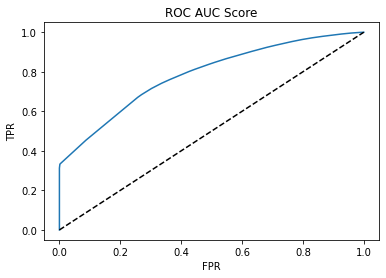

AUC SCORE : 0.7855731280985886


In [114]:
train_prob = dt_best.predict_proba(X_train[best_features_list])
train_prob = train_prob[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,train_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Score')
plt.show()
print('AUC SCORE :',metrics.roc_auc_score(y_train,train_prob))

In [73]:
update_train_scorecard('Decision Tree(Tuned)',0.72,0.68,0.71,0.70,0.78)

In [82]:
update_test_scorecard('Decision Tree(Tuned)',0.72,0.67,0.70,0.70,0.76)

### Observation :

1. `Accuracy` : Accuracy of both Train and test data have increased while using Decision Tree Classifier with tuned hyper parameters
2. `Classification Report` : Recall is also increased 0.05 percent compared to the logistc regression with significant features
3. `ROC AUC Score` : There is a significant decrease in the ROC AUC score when compared to the previous model indicating no significant increase in the true positive rate

# Random Forest 

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest Hyper Parameter Tuning 

rf_tuned_params = {'criterion' : ['entropy', 'gini'],'n_estimators' : [90, 100, 150, 200],
                'max_depth':[10, 15, 20],'min_samples_split':[2, 5, 8]}


rf_best_grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid=rf_tuned_params,cv=5)

rf_best_grid.fit(X_train[best_features_list],y_train)

In [116]:
rf_best = RandomForestClassifier(n_estimators=100,max_depth=6)

rf_best.fit(X_train[best_features_list],y_train)

RandomForestClassifier(max_depth=6)

In [117]:
print('Train Accuracy : ',rf_best.score(X_train[best_features_list],y_train))
print('Test Accuracy : ',rf_best.score(X_test[best_features_list],y_test))

Train Accuracy :  0.7040512610194544
Test Accuracy :  0.6991899189918992


In [118]:
rf_train_pred = rf_best.predict(X_train[best_features_list])
rf_test_pred = rf_best.predict(X_test[best_features_list])

In [119]:
print('Classification report of Training Set : \n')
print(metrics.classification_report(y_train,rf_train_pred))

Classification report of Training Set : 

              precision    recall  f1-score   support

           0       0.71      0.69      0.70    123305
           1       0.70      0.72      0.71    122964

    accuracy                           0.70    246269
   macro avg       0.70      0.70      0.70    246269
weighted avg       0.70      0.70      0.70    246269



In [120]:
print('Classification report of Test Set : \n')
print(metrics.classification_report(y_test,rf_test_pred))

Classification report of Test Set : 

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     52602
           1       0.70      0.71      0.70     52943

    accuracy                           0.70    105545
   macro avg       0.70      0.70      0.70    105545
weighted avg       0.70      0.70      0.70    105545



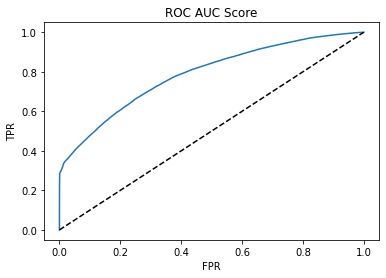

AUC SCORE : 0.7866402027840512


In [121]:
train_prob = rf_best.predict_proba(X_train[best_features_list])
train_prob = train_prob[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,train_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Score')
plt.show()
print('AUC SCORE :',metrics.roc_auc_score(y_train,train_prob))

In [74]:
update_train_scorecard('Random Forest',0.70,0.72,0.70,0.70,0.78)

In [84]:
update_test_scorecard('Random Forest',0.70,0.71,0.70,0.69,0.75)

### Observation :

1. `Accuracy` : It is observed that there is a slight decrease in accuracy when Random is used to build model with tuned hyper parameters
2. `Classification Report` : Recall is also decreased 0.02 percent compared to the previous model
3. `ROC AUC Score` : There is a significant decrease in the ROC AUC score when compared to the previous model indicating no significant increase in the true positive rate
4. `Overall` : As all the evaluation metrics are decreased, it is obvious that the Random Forest is not the best suited model for this data

# AdaBoost

In [122]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
# AdaBoost Hyper Parameter Tuning

ada_tuned_params = {'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
                    'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}

best_grid_ada = GridSearchCV(AdaBoostClassifier(),param_grid=ada_tuned_params,cv=5)

best_grid_ada.fit(X_train[best_features_list],y_train)

# Best params are learning_rate= 0.15, n_estimators= 350

In [123]:
adb_best = AdaBoostClassifier(learning_rate= 0.15, n_estimators= 350)

adb_best.fit(X_train[best_features_list],y_train)

AdaBoostClassifier(learning_rate=0.15, n_estimators=350)

In [124]:
print('Train Accuracy : ',adb_best.score(X_train[best_features_list],y_train))
print('Test Accuracy : ',adb_best.score(X_test[best_features_list],y_test))

Train Accuracy :  0.7074012563497639
Test Accuracy :  0.7067790989625279


In [125]:
adb_train_pred = rf_best.predict(X_train[best_features_list])
adb_test_pred = rf_best.predict(X_test[best_features_list])

In [126]:
print('Classification report of Training Set : \n')
print(metrics.classification_report(y_train,adb_train_pred))

Classification report of Training Set : 

              precision    recall  f1-score   support

           0       0.71      0.69      0.70    123305
           1       0.70      0.72      0.71    122964

    accuracy                           0.70    246269
   macro avg       0.70      0.70      0.70    246269
weighted avg       0.70      0.70      0.70    246269



In [127]:
print('Classification report of Test Set : \n')
print(metrics.classification_report(y_test,adb_test_pred))

Classification report of Test Set : 

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     52602
           1       0.70      0.71      0.70     52943

    accuracy                           0.70    105545
   macro avg       0.70      0.70      0.70    105545
weighted avg       0.70      0.70      0.70    105545



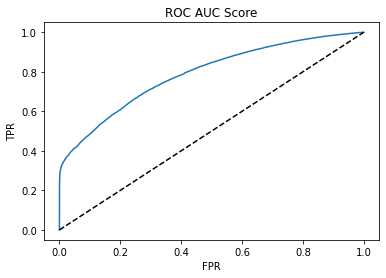

AUC SCORE : 0.788734390806728


In [128]:
train_prob = adb_best.predict_proba(X_train[best_features_list])
train_prob = train_prob[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,train_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Score')
plt.show()
print('AUC SCORE :',metrics.roc_auc_score(y_train,train_prob))

In [75]:
update_train_scorecard('AdaBoost(Tuned)',0.70,0.72,0.70,0.70,0.78)

In [85]:
update_test_scorecard('AdaBoost(Tuned)',0.70,0.71,0.70,0.70,0.76)

### Observation :

1. `Accuracy` : There is no significant difference in accuracy compared to Random Forest
2. `Classification Report` : The classification report indicates that the recall score remains constant from the previous model
3. `ROC AUC Score` : Using Ada Boost does not seem to have any impact on Roc Auc score too
4. `Overall` : As all the evaluation metrics remains constant, it is concluded that Ada Boost also is not a best suited model for this data just like Random Forest

# Gradient boosting

In [ ]:
# Gradient Boosting Hyper  Parameter Tuning

gb_tuned_params = {'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
                'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
                'max_depth' : [2, 3, 4, 5, 6]}

grad_grid = GridSearchCV(GradientBoostingClassifier(),param_grid=gb_tuned_params,cv=5)

grad_grid.fit(X_train[best_features_list],y_train)

In [129]:
# Initializing Gradient Boosting Class
gb_best = GradientBoostingClassifier()

# Fitting the X_train and y_train
gb_best.fit(X_train[best_features_list],y_train)

GradientBoostingClassifier()

In [130]:
print('Train Accuracy : ',gb_best.score(X_train[best_features_list],y_train))
print('Test Accuracy : ',gb_best.score(X_test[best_features_list],y_test))

Train Accuracy :  0.7486488352167752
Test Accuracy :  0.7462219906201146


In [131]:
gb_train_pred = gb_best.predict(X_train[best_features_list])
gb_test_pred = gb_best.predict(X_test[best_features_list])

In [132]:
print('Classification report of Training Set : \n')
print(metrics.classification_report(y_train,gb_train_pred))

Classification report of Training Set : 

              precision    recall  f1-score   support

           0       0.72      0.81      0.76    123305
           1       0.79      0.68      0.73    122964

    accuracy                           0.75    246269
   macro avg       0.75      0.75      0.75    246269
weighted avg       0.75      0.75      0.75    246269



In [133]:
print('Classification report of Test Set : \n')
print(metrics.classification_report(y_test,gb_test_pred))

Classification report of Test Set : 

              precision    recall  f1-score   support

           0       0.72      0.82      0.76     52602
           1       0.79      0.68      0.73     52943

    accuracy                           0.75    105545
   macro avg       0.75      0.75      0.75    105545
weighted avg       0.75      0.75      0.75    105545



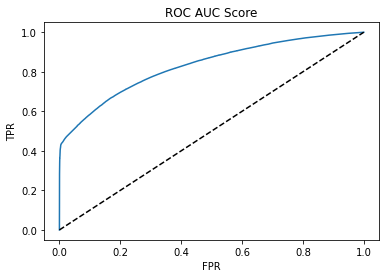

AUC SCORE : 0.8294618577238871


In [134]:
train_prob = gb_best.predict_proba(X_train[best_features_list])
train_prob = train_prob[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,train_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Score')
plt.show()
print('AUC SCORE :',metrics.roc_auc_score(y_train,train_prob))

In [76]:
update_train_scorecard('Gradient Boosting',0.79,0.68,0.75,0.74,0.82)

In [86]:
update_test_scorecard('Gradient Boosting',0.79,0.68,0.75,0.74,0.81)

### Observation :

1. `Accuracy` : Comparatively, accuracy score has been increased 6 % approximately
2. `Classification Report` : The classification report indicates that the recall score has increased 6 %
3. `ROC AUC Score` : The Roc Auc score has increased 5 % compared to Ada boosting
4. `Overall` : As all the evaluation metrics remains have been increased after applying Gradient Boosting, it is so far the best fitted model considered

# XG Boost

In [135]:
from xgboost import XGBClassifier

In [ ]:
# XG Boosting

xg_tuned_params = { 'n_estimators' : [100, 120, 150], 'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
                   'gamma' : [2, 3, 4, 5, 6],'max_depth' : [2, 3, 4, 5, 6]}

grid_xgb = GridSearchCV(XGBClassifier(),param_grid=xg_tuned_params,cv=5)

grid_xgb.fit(X_train[best_features_list],y_train)

# Best Params are gamma=2,learning_rate=0.15,max_depth=6,n_estimators=150

In [143]:
xg = XGBClassifier(gamma=2,learning_rate=0.15,max_depth=6,n_estimators=150)

xg.fit(X_train,y_train)

[11:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [144]:
print('Train Accuracy : ',xg.score(X_train,y_train))
print('Test Accuracy : ',xg.score(X_test,y_test))

Train Accuracy :  0.8546061420641656
Test Accuracy :  0.8478753138471742


In [86]:
train_pred = xg.predict(X_train)
test_pred = xg.predict(X_test)

In [87]:
print('Classification report of Training Set : \n')
print(metrics.classification_report(y_train,train_pred))

Classification report of Training Set : 

              precision    recall  f1-score   support

           0       0.78      1.00      0.87    123305
           1       0.99      0.71      0.83    122964

    accuracy                           0.85    246269
   macro avg       0.89      0.85      0.85    246269
weighted avg       0.88      0.85      0.85    246269



In [88]:
print('Classification report of Test Set : \n')
print(metrics.classification_report(y_test,test_pred))

Classification report of Test Set : 

              precision    recall  f1-score   support

           0       0.77      0.99      0.87     52602
           1       0.99      0.70      0.82     52943

    accuracy                           0.85    105545
   macro avg       0.88      0.85      0.84    105545
weighted avg       0.88      0.85      0.84    105545



In [90]:
train_prob = xg.predict_proba(X_train)
train_prob = train_prob[:,1]

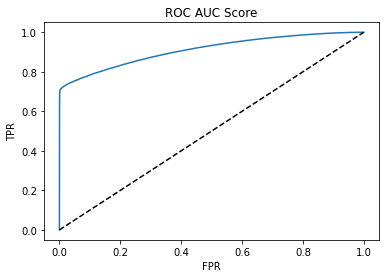

AUC SCORE : 0.9101473505539118


In [91]:
fpr,tpr,threshold = metrics.roc_curve(y_train,train_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Score')
plt.show()
print('AUC SCORE :',metrics.roc_auc_score(y_train,train_prob))

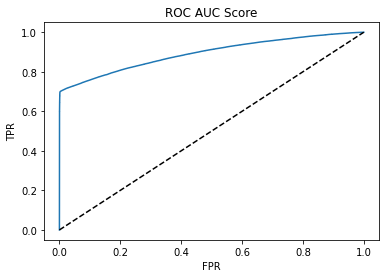

AUC SCORE : 0.8923154542940207


In [93]:
test_prob = xg.predict_proba(X_test)
test_prob = test_prob[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,test_prob)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Score')
plt.show()
print('AUC SCORE :',metrics.roc_auc_score(y_test,test_prob))

In [77]:
update_train_scorecard('XGBoost(Tuned)',0.99,0.71,0.85,0.85,0.91)

In [87]:
update_test_scorecard('XGBoost(Tuned)',0.99,0.70,0.84,0.84,0.89)

### Observation :

1. `Accuracy` : Accuracy has reached a very good score by crossing 80 %
2. `Classification Report` : The classification report indicates that the recall score also happened to increase and reach 82 %
3. `ROC AUC Score` : There is significant increase in the ROC AUC Score compared to all other models in built, reaching 87 %
4. `Overall` : As per observation over all models considered, Extreme Gradient Boosting seem to give extreme good results with great accuracy and recall along with AUC score. Hence it is the best fit and final model which could be used to predict the loan Defaulters in future

In [78]:
train_score_card

,Model Name,Precision,Recall,Weighted_F1_Score,Accuracy,ROC_AUC_SCORE
0,Base Logistic Regression,0.28,0.63,0.61,0.78,0.62
1,Base KNN,0.28,0.63,0.61,0.59,0.62
2,Logistics Regression After RFE,0.63,0.64,0.64,0.63,0.69
3,Decision Tree(Tuned),0.72,0.68,0.71,0.70,0.78
4,Random Forest,0.70,0.72,0.70,0.70,0.78
5,AdaBoost(Tuned),0.70,0.72,0.70,0.70,0.78
6,Gradient Boosting,0.79,0.68,0.75,0.74,0.82
7,XGBoost(Tuned),0.99,0.71,0.85,0.85,0.91


In [88]:
test_score_card

,Model Name,Precision,Recall,Weighted_F1_Score,Accuracy,ROC_AUC_SCORE
0,Base Logistic Regression,0.28,0.63,0.61,0.78,0.62
1,Base KNN,0.28,0.63,0.61,0.59,0.62
2,Logistics Regression After RFE,0.63,0.64,0.63,0.63,0.69
3,Decision Tree(Tuned),0.72,0.67,0.70,0.70,0.76
4,Random Forest,0.70,0.71,0.70,0.69,0.75
5,AdaBoost(Tuned),0.70,0.71,0.70,0.70,0.76
6,Gradient Boosting,0.79,0.68,0.75,0.74,0.81
7,XGBoost(Tuned),0.99,0.70,0.84,0.84,0.89
